## 1. Configuración Inicial

In [1]:
# ================================================
# Imports y Configuración
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
import warnings

# Configuración de visualización
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

# Rutas del proyecto
PROJECT_ROOT = Path.cwd().parent
DATA_PATH = PROJECT_ROOT / 'data'
REPORTS_PATH = PROJECT_ROOT / 'reports'
FIGURES_PATH = REPORTS_PATH / 'figures'

# Crear carpetas si no existen
REPORTS_PATH.mkdir(exist_ok=True)
FIGURES_PATH.mkdir(exist_ok=True)

# Constantes financieras
TRADING_DAYS = 252  # Días de trading por año
RISK_FREE_RATE = 0.05  # Tasa libre de riesgo anualizada (5%)
BENCHMARK = 'SPY'

print(f"📁 Proyecto: {PROJECT_ROOT}")
print(f"📊 Datos: {DATA_PATH}")
print(f"📈 Días de trading/año: {TRADING_DAYS}")
print(f"💰 Tasa libre de riesgo: {RISK_FREE_RATE*100:.1f}%")

📁 Proyecto: c:\Users\carlo\Documents\4.DS\riskmanagement2025
📊 Datos: c:\Users\carlo\Documents\4.DS\riskmanagement2025\data
📈 Días de trading/año: 252
💰 Tasa libre de riesgo: 5.0%


## 2. Carga de Datos

In [2]:
# ================================================
# Cargar base de datos Train
# ================================================
print("⏳ Cargando datos de entrenamiento...")

prices_train = pd.read_csv(
    DATA_PATH / 'prices_train.csv',
    index_col=0,
    parse_dates=True
)

print(f"\n✅ Datos cargados exitosamente")
print(f"   📊 Dimensiones: {prices_train.shape[0]:,} fechas x {prices_train.shape[1]} activos")
print(f"   📅 Rango: {prices_train.index.min()} → {prices_train.index.max()}")
print(f"   🎯 Benchmark ({BENCHMARK}): {'✅ Disponible' if BENCHMARK in prices_train.columns else '❌ No disponible'}")

# Lista de tickers (excluyendo benchmark para el análisis)
all_tickers = prices_train.columns.tolist()
print(f"\n📋 Total de activos: {len(all_tickers)}")

# Muestra de datos
display(prices_train.head())

⏳ Cargando datos de entrenamiento...

✅ Datos cargados exitosamente
   📊 Dimensiones: 753 fechas x 468 activos
   📅 Rango: 2021-01-04 00:00:00 → 2023-12-29 00:00:00
   🎯 Benchmark (SPY): ✅ Disponible

📋 Total de activos: 468


,A,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,ADP,AEE,AEP,AES,AFL,AGG,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMZN,AON,APA,APD,APH,ARE,ARKK,ATO,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BALL,BBWI,BBY,BDX,BEN,BIIB,BIO,BK,BKNG,BKR,BLK,BMY,BND,BR,BRO,BSX,BWA,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CI,CINF,CL,CLX,CMA,CME,CMG,CMI,CMS,CNC,CNP,COF,COST,CPB,CPRT,CPT,CRL,CRM,CSCO,CSX,CTAS,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DBC,DD,DE,DGX,DHI,DHR,DIA,DLR,DLTR,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DVY,DXCM,EA,ECL,ED,EEM,EFA,EFX,EIX,EL,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,ES,ESS,ETN,ETR,ETSY,EW,EWG,EWJ,EWU,EWZ,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FIS,FITB,FMC,FOX,FOXA,FRT,FTNT,FTV,FXI,GD,GDX,GDXJ,GE,GILD,GIS,GL,GLD,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HDV,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HSY,HUM,HYG,IBB,IBM,ICE,IDXX,IEF,IEFA,IEMG,IEX,IFF,IJH,IJR,INCY,INTC,INTU,INVH,IP,IQV,IR,ISRG,IT,ITW,IVV,IVZ,IWM,IYR,J,JBHT,JCI,JKHY,JNJ,JPM,KBE,KDP,KEY,KEYS,KHC,KLAC,KMB,KMX,KO,KR,KRE,KWEB,L,LDOS,LEN,LH,LHX,LKQ,LLY,LNT,LOW,LQD,LRCX,LUMN,LUV,LVS,LW,LYB,MA,MAA,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDY,MET,META,MGM,MKC,MKTX,MLM,MMC,MMM,MO,MOH,MOS,MPC,MRK,MSCI,MSFT,MTB,MTCH,MTD,MU,NCLH,NDSN,NEE,NEM,NI,NKE,NOC,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWS,NWSA,O,OKE,ORCL,ORLY,OTIS,OXY,PAYC,PAYX,PCAR,PEP,PFG,PG,PGR,PH,PHM,PLD,PM,PNC,PNR,PNW,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,QCOM,QQQ,QRVO,RCL,REG,REGN,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RTX,SBAC,SBNY,SBUX,SCHD,SCHW,SEDG,SEE,SHW,SHY,SJM,SLB,SLV,SMH,SNA,SNPS,SO,SOXX,SPG,SPGI,SPY,SRE,STE,STT,STZ,SWKS,SYK,SYY,TAP,TDG,TDY,TECH,TEL,TER,TFC,TFX,TGT,TIP,TLT,TMO,TMUS,TPR,TRMB,TROW,TRV,TSLA,TSN,TT,TTWO,TXN,TXT,UAL,UDR,UHS,UNG,UNH,UNP,URI,USB,USO,V,VEA,VFC,VIXY,VLO,VMC,VNQ,VOO,VRSK,VRSN,VRTX,VTI,VTR,VWO,VXX,VYM,VZ,WAB,WAT,WDC,WEC,WELL,WHR,WM,WMB,WMT,WRB,WST,WY,WYNN,XBI,XEL,XHB,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XME,XOM,XOP,XRAY,XRT,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04,118.6400,15.1300,157.3400,129.4100,105.4100,109.1100,256.4600,485.3400,146.0200,49.8700,168.9600,76.1300,81.5400,23.2400,43.1900,118.0400,37.1300,132.1100,120.2400,105.2400,152.6300,526.4600,49.2400,108.0800,114.4800,86.8700,11.3800,92.3000,118.3800,226.6600,188.1100,159.3300,204.5500,14.7700,268.2000,32.1300,170.7700,124.6900,94.0300,155.5200,42.5200,151.9000,150.2400,118.0400,1180.4000,202.7200,89.7600,32.0000,100.4900,244.4100,24.3400,242.9500,575.2600,41.6900,2164.0800,21.0200,710.8200,61.3800,88.0700,151.5100,46.3500,35.2700,33.4800,60.1400,35.9900,52.9300,37.0300,182.1500,149.7300,92.6100,59.5000,155.0000,20.3800,135.7600,127.1600,125.9300,38.5300,35.5200,86.6000,92.3700,205.7200,84.5000,84.3300,200.4400,55.5000,179.3000,26.3800,221.3700,59.6100,62.0900,21.3400,97.8400,380.1500,48.5300,30.1600,96.3000,249.6700,220.3100,43.9600,29.3300,85.9000,79.4200,38.3500,69.9900,84.7100,71.6000,73.8900,38.7300,14.6200,29.4100,267.6400,121.1200,67.3400,197.8700,302.3200,135.2900,106.9400,123.3400,54.0400,379.5000,116.2400,101.5800,89.7100,116.5000,16.1300,94.7600,89.4400,139.5100,214.3100,70.6600,52.0000,73.3400,187.9600,60.4900,254.9900,98.5800,78.0100,172.2400,49.8600,348.0600,692.5600,57.5000,84.5100,228.2500,118.7500,49.0100,172.0800,88.9200,32.1600,66.7600,29.6800,36.5700,29.3600,92.3100,131.3700,110.2900,8.5200,48.9400,23.8300,27.1400,330.5900,253.1900,29.5100,175.8500,139.9100,27.2300,113.1200,28.4100,28.8100,82.2700,29.1100,51.8400,46.3000,145.9400,38.5100,58.0500,52.1229,60.1100,59.0300,92.4000,182.3300,34.9200,40.5100,224.5600,86.4100,86.3100,98.4400,207.

## 3. Calcular Retornos Diarios y Mensuales

In [3]:
# ================================================
# Calcular Retornos Diarios
# ================================================
print("📊 Calculando retornos diarios...")

# Retornos diarios simples
returns_daily = prices_train.pct_change().dropna()

print(f"\n✅ Retornos diarios calculados")
print(f"   📊 Dimensiones: {returns_daily.shape[0]:,} días x {returns_daily.shape[1]} activos")

# Estadísticas básicas de retornos
print(f"\n📈 Estadísticas de retornos diarios:")
print(f"   • Retorno medio diario (promedio): {returns_daily.mean().mean()*100:.4f}%")
print(f"   • Desviación estándar diaria (promedio): {returns_daily.std().mean()*100:.4f}%")

display(returns_daily.head())

📊 Calculando retornos diarios...

✅ Retornos diarios calculados
   📊 Dimensiones: 752 días x 468 activos

📈 Estadísticas de retornos diarios:
   • Retorno medio diario (promedio): 0.0432%
   • Desviación estándar diaria (promedio): 1.9009%


,A,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,ADP,AEE,AEP,AES,AFL,AGG,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMZN,AON,APA,APD,APH,ARE,ARKK,ATO,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BALL,BBWI,BBY,BDX,BEN,BIIB,BIO,BK,BKNG,BKR,BLK,BMY,BND,BR,BRO,BSX,BWA,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CI,CINF,CL,CLX,CMA,CME,CMG,CMI,CMS,CNC,CNP,COF,COST,CPB,CPRT,CPT,CRL,CRM,CSCO,CSX,CTAS,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DBC,DD,DE,DGX,DHI,DHR,DIA,DLR,DLTR,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DVY,DXCM,EA,ECL,ED,EEM,EFA,EFX,EIX,EL,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,ES,ESS,ETN,ETR,ETSY,EW,EWG,EWJ,EWU,EWZ,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FIS,FITB,FMC,FOX,FOXA,FRT,FTNT,FTV,FXI,GD,GDX,GDXJ,GE,GILD,GIS,GL,GLD,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HDV,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HSY,HUM,HYG,IBB,IBM,ICE,IDXX,IEF,IEFA,IEMG,IEX,IFF,IJH,IJR,INCY,INTC,INTU,INVH,IP,IQV,IR,ISRG,IT,ITW,IVV,IVZ,IWM,IYR,J,JBHT,JCI,JKHY,JNJ,JPM,KBE,KDP,KEY,KEYS,KHC,KLAC,KMB,KMX,KO,KR,KRE,KWEB,L,LDOS,LEN,LH,LHX,LKQ,LLY,LNT,LOW,LQD,LRCX,LUMN,LUV,LVS,LW,LYB,MA,MAA,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDY,MET,META,MGM,MKC,MKTX,MLM,MMC,MMM,MO,MOH,MOS,MPC,MRK,MSCI,MSFT,MTB,MTCH,MTD,MU,NCLH,NDSN,NEE,NEM,NI,NKE,NOC,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWS,NWSA,O,OKE,ORCL,ORLY,OTIS,OXY,PAYC,PAYX,PCAR,PEP,PFG,PG,PGR,PH,PHM,PLD,PM,PNC,PNR,PNW,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,QCOM,QQQ,QRVO,RCL,REG,REGN,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RTX,SBAC,SBNY,SBUX,SCHD,SCHW,SEDG,SEE,SHW,SHY,SJM,SLB,SLV,SMH,SNA,SNPS,SO,SOXX,SPG,SPGI,SPY,SRE,STE,STT,STZ,SWKS,SYK,SYY,TAP,TDG,TDY,TECH,TEL,TER,TFC,TFX,TGT,TIP,TLT,TMO,TMUS,TPR,TRMB,TROW,TRV,TSLA,TSN,TT,TTWO,TXN,TXT,UAL,UDR,UHS,UNG,UNH,UNP,URI,USB,USO,V,VEA,VFC,VIXY,VLO,VMC,VNQ,VOO,VRSK,VRSN,VRTX,VTI,VTR,VWO,VXX,VYM,VZ,WAB,WAT,WDC,WEC,WELL,WHR,WM,WMB,WMT,WRB,WST,WY,WYNN,XBI,XEL,XHB,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XME,XOM,XOP,XRAY,XRT,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.0082,0.0198,-0.0011,0.0124,0.0103,0.0124,0.0057,0.0007,0.0179,0.0195,-0.0028,-0.0049,-0.0013,0.0336,0.0016,-0.0010,0.0167,0.0003,-0.0067,0.0017,0.0675,0.0327,0.0126,-0.0079,0.0019,0.0314,0.0070,0.0051,0.0069,0.0049,-0.0058,0.0100,-0.0012,0.0955,0.0529,0.0174,-0.0011,0.0246,-0.0151,-0.0029,0.0068,0.0022,0.0057,0.0053,-0.0000,0.0440,0.0096,0.0212,0.0051,0.0013,-0.0025,0.0142,0.0154,0.0113,0.0111,0.0114,0.0053,0.0028,-0.0017,0.0014,-0.0006,0.0275,0.0236,0.0259,-0.0119,0.0036,0.0246,0.0082,0.0008,-0.0006,-0.0013,0.0039,0.0108,0.0028,0.0053,0.0450,0.0400,0.0217,-0.0090,-0.0094,-0.0111,-0.0095,0.0023,-0.0021,0.0234,-0.0010,0.0273,0.0012,-0.0178,-0.0164,0.0108,0.0235,-0.0116,0.0076,-0.0043,-0.0079,0.0117,0.0055,0.0005,0.0170,0.0154,0.0029,0.0123,0.0067,0.0270,0.0443,-0.0120,0.0212,0.0280,0.0490,0.0248,0.0051,-0.0138,0.0248,0.0050,-0.0172,0.0018,0.0058,0.0326,0.0048,0.0160,0.0016,0.0004,0.0004,0.0763,0.0115,0.0307,0.0130,0.0105,-0.0112,0.0240,0.0104,0.0102,0.0053,0.0151,0.0289,0.0173,0.0536,0.0814,-0.0068,-0.0015,-0.0078,0.0072,-0.0045,0.0106,-0.0135,0.0169,-0.0054,0.0050,0.0093,0.0155,0.0057,-0.0014,-0.0027,0.0439,-0.0128,0.0153,0.0966,0.0130,0.0453,-0.0031,-0.0000,0.0112,0.0080,-0.0231,0.0140,0.0255,0.0215,0.0222,0.0041,-0.0261,-0.0044,0.0272,0.0005,-0.0003,0.0016,0.0287,-0.0018,0.0010,-0.0008,0.0030,0.0215,0.0284,0.0152,0.0074,0.0080,0.0092,-0.0090,-0.0020,0.0224,0.0029,0.0839,0.0133,0.0223,0.0084,0.0081,0.0093,-0.0066,0.0092,0.0046,0.0397,0.0024,0.0182,0.0145,-0.0112,0.0194,-0.0011,0.0024,0.0003,0.0021,0.0178,0.0021,0.0112,-0.0023,0.0112,0.0216,-0.0019,0.0277

In [4]:
# ================================================
# Calcular Retornos Mensuales
# ================================================
print("📊 Calculando retornos mensuales...")

# Precios al final de cada mes
prices_monthly = prices_train.resample('ME').last()

# Retornos mensuales
returns_monthly = prices_monthly.pct_change().dropna()

print(f"\n✅ Retornos mensuales calculados")
print(f"   📊 Dimensiones: {returns_monthly.shape[0]:,} meses x {returns_monthly.shape[1]} activos")

display(returns_monthly.head())

📊 Calculando retornos mensuales...

✅ Retornos mensuales calculados
   📊 Dimensiones: 35 meses x 468 activos


,A,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,ADP,AEE,AEP,AES,AFL,AGG,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMZN,AON,APA,APD,APH,ARE,ARKK,ATO,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BALL,BBWI,BBY,BDX,BEN,BIIB,BIO,BK,BKNG,BKR,BLK,BMY,BND,BR,BRO,BSX,BWA,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CI,CINF,CL,CLX,CMA,CME,CMG,CMI,CMS,CNC,CNP,COF,COST,CPB,CPRT,CPT,CRL,CRM,CSCO,CSX,CTAS,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DBC,DD,DE,DGX,DHI,DHR,DIA,DLR,DLTR,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DVY,DXCM,EA,ECL,ED,EEM,EFA,EFX,EIX,EL,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,ES,ESS,ETN,ETR,ETSY,EW,EWG,EWJ,EWU,EWZ,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FIS,FITB,FMC,FOX,FOXA,FRT,FTNT,FTV,FXI,GD,GDX,GDXJ,GE,GILD,GIS,GL,GLD,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HDV,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HSY,HUM,HYG,IBB,IBM,ICE,IDXX,IEF,IEFA,IEMG,IEX,IFF,IJH,IJR,INCY,INTC,INTU,INVH,IP,IQV,IR,ISRG,IT,ITW,IVV,IVZ,IWM,IYR,J,JBHT,JCI,JKHY,JNJ,JPM,KBE,KDP,KEY,KEYS,KHC,KLAC,KMB,KMX,KO,KR,KRE,KWEB,L,LDOS,LEN,LH,LHX,LKQ,LLY,LNT,LOW,LQD,LRCX,LUMN,LUV,LVS,LW,LYB,MA,MAA,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDY,MET,META,MGM,MKC,MKTX,MLM,MMC,MMM,MO,MOH,MOS,MPC,MRK,MSCI,MSFT,MTB,MTCH,MTD,MU,NCLH,NDSN,NEE,NEM,NI,NKE,NOC,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWS,NWSA,O,OKE,ORCL,ORLY,OTIS,OXY,PAYC,PAYX,PCAR,PEP,PFG,PG,PGR,PH,PHM,PLD,PM,PNC,PNR,PNW,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,QCOM,QQQ,QRVO,RCL,REG,REGN,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RTX,SBAC,SBNY,SBUX,SCHD,SCHW,SEDG,SEE,SHW,SHY,SJM,SLB,SLV,SMH,SNA,SNPS,SO,SOXX,SPG,SPGI,SPY,SRE,STE,STT,STZ,SWKS,SYK,SYY,TAP,TDG,TDY,TECH,TEL,TER,TFC,TFX,TGT,TIP,TLT,TMO,TMUS,TPR,TRMB,TROW,TRV,TSLA,TSN,TT,TTWO,TXN,TXT,UAL,UDR,UHS,UNG,UNH,UNP,URI,USB,USO,V,VEA,VFC,VIXY,VLO,VMC,VNQ,VOO,VRSK,VRSN,VRTX,VTI,VTR,VWO,VXX,VYM,VZ,WAB,WAT,WDC,WEC,WELL,WHR,WM,WMB,WMT,WRB,WST,WY,WYNN,XBI,XEL,XHB,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XME,XOM,XOP,XRAY,XRT,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-28,0.0158,0.2196,0.0752,-0.0811,0.0513,-0.0308,0.0371,0.0020,0.0576,0.1314,0.0539,-0.0337,-0.0749,0.0890,0.0600,-0.0168,0.1739,-0.0904,0.0380,-0.1489,-0.0335,0.0794,0.3316,-0.0054,0.0165,0.2225,0.0000,-0.0132,0.0416,-0.0684,0.1181,-0.0353,0.1212,0.3817,-0.0418,0.0064,-0.0444,-0.0515,-0.0493,0.0738,0.0431,0.1613,-0.1078,0.1634,0.0372,0.0918,-0.0299,0.3412,-0.0778,-0.0788,-0.0046,-0.0344,0.0187,0.0585,0.1976,0.2185,-0.0096,-0.0016,-0.0170,0.0084,0.0652,0.0942,0.0718,0.1361,-0.0194,-0.0411,-0.0512,0.1807,0.1161,0.0788,0.2425,-0.0220,0.4328,0.0821,0.1916,0.1372,0.0942,0.1921,-0.0673,0.0618,-0.0329,0.1639,-0.0359,-0.1356,0.1906,0.0988,-0.0257,0.0801,-0.0487,-0.0292,-0.0782,0.1528,-0.0608,-0.0547,-0.0055,0.0196,0.1046,-0.0402,0.0065,0.0679,0.0195,-0.0573,0.1327,-0.0491,0.1737,0.3275,-0.0627,0.2629,0.1014,-0.1150,0.2089,-0.1050,0.0009,-0.0764,0.0322,-0.0641,-0.0340,0.0581,0.1428,-0.0654,0.1749,-0.0084,-0.0895,-0.1298,0.3086,0.0864,0.0613,-0.0645,0.0237,-0.0725,0.0079,0.0224,-0.0860,-0.0717,0.2079,0.1109,0.0825,-0.0345,0.2669,0.0847,-0.1238,0.0612,-0.0917,0.0634,0.1061,-0.0894,0.1064,0.0063,0.0175,0.0184,0.0394,-0.0670,-0.0712,0.0259,0.2973,0.1047,0.1111,0.2221,0.0167,0.2601,0.0052,0.0814,0.0774,-0.0305,0.1178,0.1991,-0.0609,0.0683,0.0683,0.1554,0.1665,-0.0038,-0.0059,0.1145,-0.0979,-0.0863,0.1742,-0.0640,-0.0532,0.0333,-0.0626,0.0661,0.0128,0.3374,0.1095,0.1065,0.1222,0.1216,0.0797,0.1782,0.0228,0.2382,-0.0012,0.1604,0.0588,-0.0461,0.0332,0.0556,0.1181,0.2198,-0.0958,0.0357,0.1799,0.1902,-0.0105,-0.0607,0.0014,-0.0090,-0.0061,-0.0231,-0.0015,-0.0004,0.0867,-0.0243,0.

In [5]:
# ================================================
# Calcular Retornos Acumulados por Períodos
# ================================================
print("📊 Calculando retornos acumulados por períodos...")

# Retorno total del período (2021-2023)
total_return = (prices_train.iloc[-1] / prices_train.iloc[0] - 1)

# Retorno anualizado
n_years = (prices_train.index[-1] - prices_train.index[0]).days / 365.25
annualized_return = (1 + total_return) ** (1/n_years) - 1

# Retornos por año
returns_2021 = (prices_train.loc['2021-12-31'] / prices_train.loc['2021-01-04'] - 1) if '2021-12-31' in prices_train.index else None
returns_2022 = (prices_train.loc['2022-12-30'] / prices_train.loc['2022-01-03'] - 1) if '2022-12-30' in prices_train.index else None
returns_2023 = (prices_train.loc['2023-12-29'] / prices_train.loc['2023-01-03'] - 1) if '2023-12-29' in prices_train.index else None

print(f"\n✅ Retornos acumulados calculados")
print(f"   • Período total: {n_years:.2f} años")
print(f"   • Retorno total promedio: {total_return.mean()*100:.2f}%")
print(f"   • Retorno anualizado promedio: {annualized_return.mean()*100:.2f}%")

📊 Calculando retornos acumulados por períodos...

✅ Retornos acumulados calculados
   • Período total: 2.98 años
   • Retorno total promedio: 25.69%
   • Retorno anualizado promedio: 6.00%


## 4. Calcular Volatilidad Anualizada

📊 Calculando volatilidad anualizada...

✅ Volatilidad calculada
   • Volatilidad anualizada promedio: 30.18%
   • Volatilidad mínima: 2.19% (SHY)
   • Volatilidad máxima: 411.23% (SBNY)


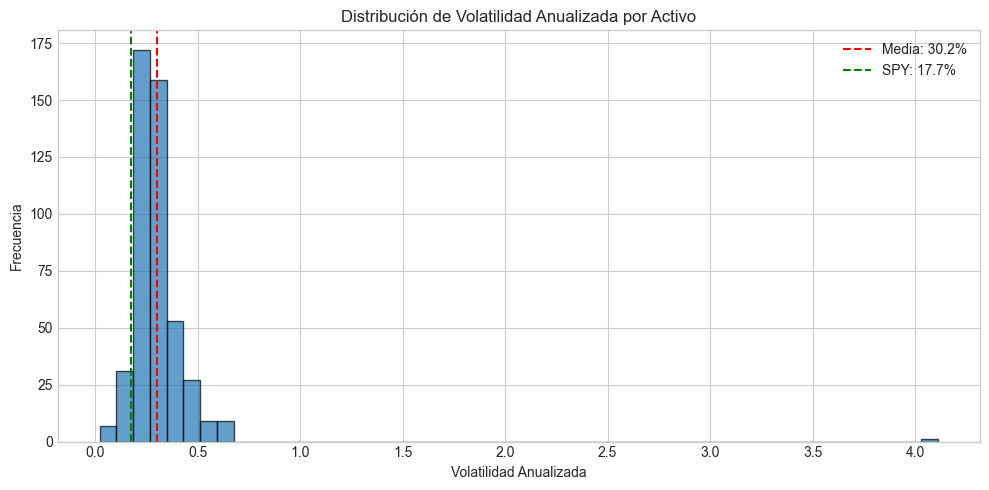

In [6]:
# ================================================
# Calcular Volatilidad Anualizada
# ================================================
print("📊 Calculando volatilidad anualizada...")

# Volatilidad diaria
volatility_daily = returns_daily.std()

# Volatilidad anualizada (sqrt de días de trading)
volatility_annual = volatility_daily * np.sqrt(TRADING_DAYS)

print(f"\n✅ Volatilidad calculada")
print(f"   • Volatilidad anualizada promedio: {volatility_annual.mean()*100:.2f}%")
print(f"   • Volatilidad mínima: {volatility_annual.min()*100:.2f}% ({volatility_annual.idxmin()})")
print(f"   • Volatilidad máxima: {volatility_annual.max()*100:.2f}% ({volatility_annual.idxmax()})")

# Distribución de volatilidades
fig, ax = plt.subplots(figsize=(10, 5))
volatility_annual.hist(bins=50, ax=ax, edgecolor='black', alpha=0.7)
ax.axvline(x=volatility_annual.mean(), color='red', linestyle='--', label=f'Media: {volatility_annual.mean()*100:.1f}%')
ax.axvline(x=volatility_annual[BENCHMARK], color='green', linestyle='--', label=f'{BENCHMARK}: {volatility_annual[BENCHMARK]*100:.1f}%')
ax.set_xlabel('Volatilidad Anualizada')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de Volatilidad Anualizada por Activo')
ax.legend()
plt.tight_layout()
plt.savefig(FIGURES_PATH / '02_volatility_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Calcular Sharpe Ratio

In [7]:
# ================================================
# Calcular Sharpe Ratio
# Sharpe = (Retorno - Rf) / Volatilidad
# ================================================
print("📊 Calculando Sharpe Ratio...")

# Retorno anualizado por activo
mean_return_annual = returns_daily.mean() * TRADING_DAYS

# Sharpe Ratio
sharpe_ratio = (mean_return_annual - RISK_FREE_RATE) / volatility_annual

print(f"\n✅ Sharpe Ratio calculado")
print(f"   • Sharpe promedio: {sharpe_ratio.mean():.3f}")
print(f"   • Mejor Sharpe: {sharpe_ratio.max():.3f} ({sharpe_ratio.idxmax()})")
print(f"   • Peor Sharpe: {sharpe_ratio.min():.3f} ({sharpe_ratio.idxmin()})")
print(f"   • Sharpe {BENCHMARK}: {sharpe_ratio[BENCHMARK]:.3f}")

# Top 10 mejores Sharpe
print(f"\n📋 Top 10 Activos por Sharpe Ratio:")
top_sharpe = sharpe_ratio.sort_values(ascending=False).head(10)
for i, (ticker, sr) in enumerate(top_sharpe.items(), 1):
    print(f"   {i:2}. {ticker:<6} | Sharpe: {sr:.3f}")

📊 Calculando Sharpe Ratio...

✅ Sharpe Ratio calculado
   • Sharpe promedio: 0.148
   • Mejor Sharpe: 1.416 (LLY)
   • Peor Sharpe: -3.070 (SHY)
   • Sharpe SPY: 0.287

📋 Top 10 Activos por Sharpe Ratio:
    1. LLY    | Sharpe: 1.416
    2. MCK    | Sharpe: 1.374
    3. MPC    | Sharpe: 1.326
    4. SBNY   | Sharpe: 1.241
    5. PWR    | Sharpe: 1.178
    6. IT     | Sharpe: 1.119
    7. NUE    | Sharpe: 1.066
    8. NVDA   | Sharpe: 1.008
    9. AVGO   | Sharpe: 0.995
   10. OXY    | Sharpe: 0.984


## 6. Calcular Sortino Ratio

📊 Calculando Sortino Ratio...

✅ Sortino Ratio calculado
   • Sortino promedio: 0.154
   • Mejor Sortino: 2.291 (SBNY)
   • Sortino SPY: 0.281


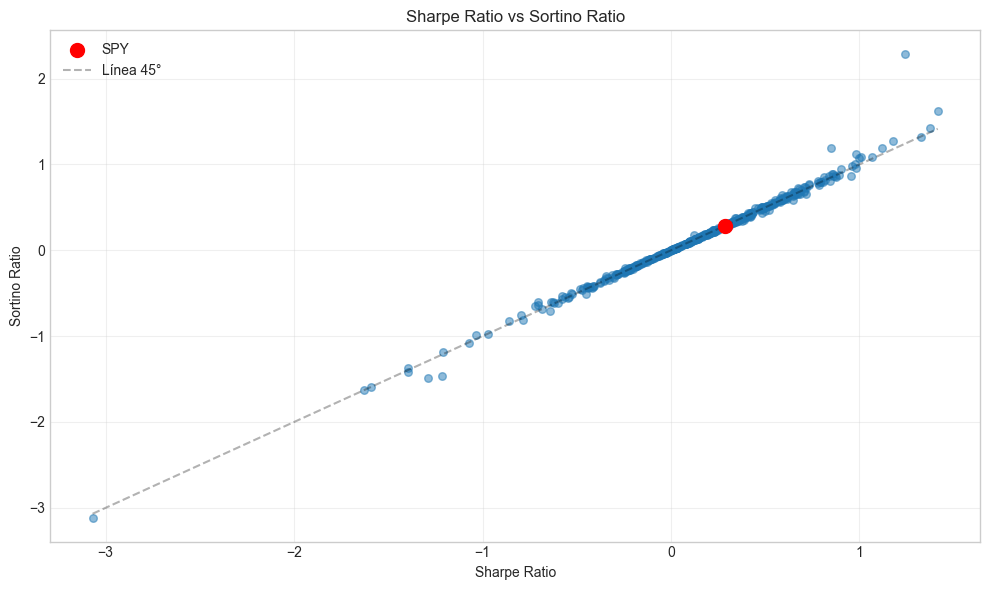

In [8]:
# ================================================
# Calcular Sortino Ratio
# Sortino = (Retorno - Rf) / Downside Deviation
# Solo considera volatilidad de retornos negativos
# ================================================
print("📊 Calculando Sortino Ratio...")

# Downside deviation (solo retornos negativos)
def downside_deviation(returns, target=0):
    """Calcula la desviación a la baja (downside deviation)"""
    negative_returns = returns[returns < target]
    if len(negative_returns) == 0:
        return 0
    return np.sqrt((negative_returns ** 2).mean())

# Calcular downside deviation para cada activo
downside_dev_daily = returns_daily.apply(downside_deviation)
downside_dev_annual = downside_dev_daily * np.sqrt(TRADING_DAYS)

# Sortino Ratio
sortino_ratio = (mean_return_annual - RISK_FREE_RATE) / downside_dev_annual
sortino_ratio = sortino_ratio.replace([np.inf, -np.inf], np.nan)  # Manejar infinitos

print(f"\n✅ Sortino Ratio calculado")
print(f"   • Sortino promedio: {sortino_ratio.mean():.3f}")
print(f"   • Mejor Sortino: {sortino_ratio.max():.3f} ({sortino_ratio.idxmax()})")
print(f"   • Sortino {BENCHMARK}: {sortino_ratio[BENCHMARK]:.3f}")

# Comparación Sharpe vs Sortino
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(sharpe_ratio, sortino_ratio, alpha=0.5, s=30)
ax.scatter(sharpe_ratio[BENCHMARK], sortino_ratio[BENCHMARK], color='red', s=100, label=BENCHMARK, zorder=5)
ax.plot([sharpe_ratio.min(), sharpe_ratio.max()], [sharpe_ratio.min(), sharpe_ratio.max()], 'k--', alpha=0.3, label='Línea 45°')
ax.set_xlabel('Sharpe Ratio')
ax.set_ylabel('Sortino Ratio')
ax.set_title('Sharpe Ratio vs Sortino Ratio')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(FIGURES_PATH / '02_sharpe_vs_sortino.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Calcular Maximum Drawdown

📊 Calculando Maximum Drawdown...

✅ Maximum Drawdown calculado
   • MDD promedio: -40.63%
   • Menor MDD (mejor): -6.82% (SHY)
   • Mayor MDD (peor): -100.00% (SBNY)
   • MDD SPY: -25.36%


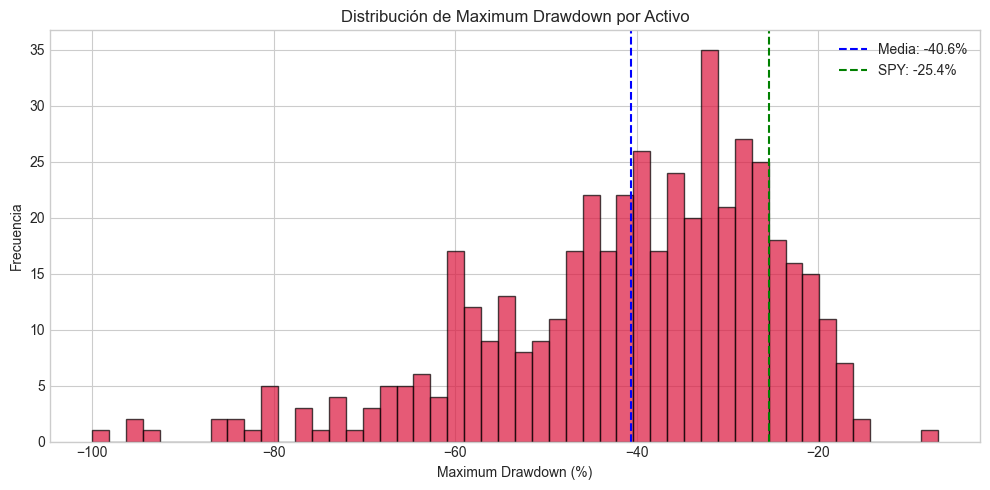

In [9]:
# ================================================
# Calcular Maximum Drawdown
# MDD = (Valle - Pico) / Pico
# ================================================
print("📊 Calculando Maximum Drawdown...")

def calculate_max_drawdown(prices):
    """Calcula el maximum drawdown de una serie de precios"""
    # Máximo acumulado
    rolling_max = prices.cummax()
    # Drawdown en cada punto
    drawdown = (prices - rolling_max) / rolling_max
    # Maximum drawdown
    return drawdown.min()

# Calcular MDD para cada activo
max_drawdown = prices_train.apply(calculate_max_drawdown)

print(f"\n✅ Maximum Drawdown calculado")
print(f"   • MDD promedio: {max_drawdown.mean()*100:.2f}%")
print(f"   • Menor MDD (mejor): {max_drawdown.max()*100:.2f}% ({max_drawdown.idxmax()})")
print(f"   • Mayor MDD (peor): {max_drawdown.min()*100:.2f}% ({max_drawdown.idxmin()})")
print(f"   • MDD {BENCHMARK}: {max_drawdown[BENCHMARK]*100:.2f}%")

# Distribución de Maximum Drawdown
fig, ax = plt.subplots(figsize=(10, 5))
(max_drawdown * 100).hist(bins=50, ax=ax, edgecolor='black', alpha=0.7, color='crimson')
ax.axvline(x=max_drawdown.mean()*100, color='blue', linestyle='--', label=f'Media: {max_drawdown.mean()*100:.1f}%')
ax.axvline(x=max_drawdown[BENCHMARK]*100, color='green', linestyle='--', label=f'{BENCHMARK}: {max_drawdown[BENCHMARK]*100:.1f}%')
ax.set_xlabel('Maximum Drawdown (%)')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de Maximum Drawdown por Activo')
ax.legend()
plt.tight_layout()
plt.savefig(FIGURES_PATH / '02_mdd_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Calcular Calmar Ratio

In [10]:
# ================================================
# Calcular Calmar Ratio
# Calmar = Retorno Anualizado / |Maximum Drawdown|
# ================================================
print("📊 Calculando Calmar Ratio...")

# Calmar Ratio (usando valor absoluto del MDD)
calmar_ratio = annualized_return / abs(max_drawdown)
calmar_ratio = calmar_ratio.replace([np.inf, -np.inf], np.nan)  # Manejar infinitos

print(f"\n✅ Calmar Ratio calculado")
print(f"   • Calmar promedio: {calmar_ratio.mean():.3f}")
print(f"   • Mejor Calmar: {calmar_ratio.max():.3f} ({calmar_ratio.idxmax()})")
print(f"   • Peor Calmar: {calmar_ratio.min():.3f} ({calmar_ratio.idxmin()})")
print(f"   • Calmar {BENCHMARK}: {calmar_ratio[BENCHMARK]:.3f}")

# Top 10 mejores Calmar
print(f"\n📋 Top 10 Activos por Calmar Ratio:")
top_calmar = calmar_ratio.sort_values(ascending=False).head(10)
for i, (ticker, cr) in enumerate(top_calmar.items(), 1):
    print(f"   {i:2}. {ticker:<6} | Calmar: {cr:.3f}")

📊 Calculando Calmar Ratio...

✅ Calmar Ratio calculado
   • Calmar promedio: 0.236
   • Mejor Calmar: 2.804 (LLY)
   • Peor Calmar: -0.775 (SBNY)
   • Calmar SPY: 0.350

📋 Top 10 Activos por Calmar Ratio:
    1. LLY    | Calmar: 2.804
    2. MCK    | Calmar: 2.475
    3. PWR    | Calmar: 1.897
    4. MPC    | Calmar: 1.795
    5. XOM    | Calmar: 1.672
    6. GWW    | Calmar: 1.657
    7. OXY    | Calmar: 1.534
    8. FANG   | Calmar: 1.411
    9. AZO    | Calmar: 1.406
   10. IT     | Calmar: 1.238


## 9. Calcular Beta vs SPY

📊 Calculando Beta vs SPY...

✅ Beta calculado
   • Beta promedio: 0.903
   • Beta mínimo: -2.863 (VIXY)
   • Beta máximo: 2.131 (NVDA)
   • Beta SPY: 1.000 (debe ser ~1.0)


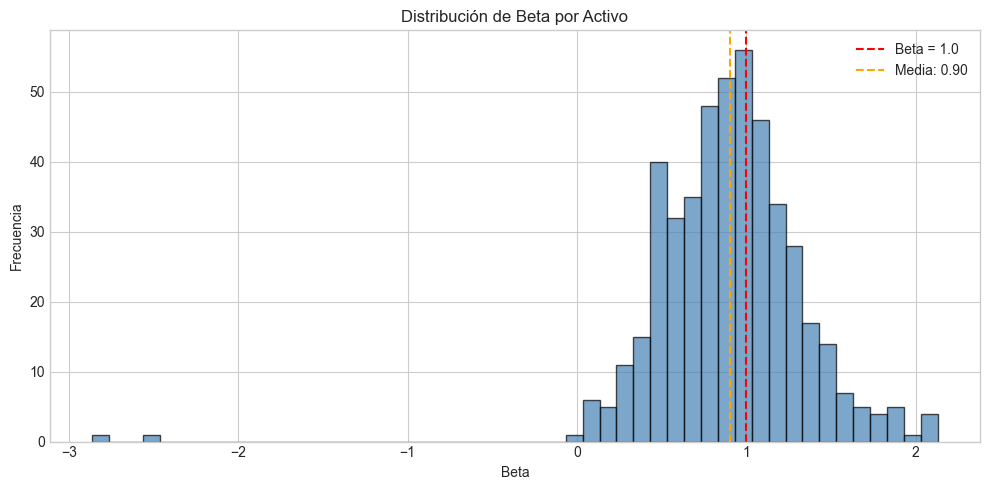

In [11]:
# ================================================
# Calcular Beta vs SPY (Benchmark)
# Beta = Cov(Ri, Rm) / Var(Rm)
# ================================================
print("📊 Calculando Beta vs SPY...")

# Retornos del benchmark
benchmark_returns = returns_daily[BENCHMARK]

# Varianza del benchmark
benchmark_variance = benchmark_returns.var()

# Calcular beta para cada activo
def calculate_beta(asset_returns, market_returns):
    """Calcula el beta de un activo respecto al mercado"""
    covariance = asset_returns.cov(market_returns)
    variance = market_returns.var()
    return covariance / variance

beta = returns_daily.apply(lambda x: calculate_beta(x, benchmark_returns))

print(f"\n✅ Beta calculado")
print(f"   • Beta promedio: {beta.mean():.3f}")
print(f"   • Beta mínimo: {beta.min():.3f} ({beta.idxmin()})")
print(f"   • Beta máximo: {beta.max():.3f} ({beta.idxmax()})")
print(f"   • Beta {BENCHMARK}: {beta[BENCHMARK]:.3f} (debe ser ~1.0)")

# Distribución de Betas
fig, ax = plt.subplots(figsize=(10, 5))
beta.hist(bins=50, ax=ax, edgecolor='black', alpha=0.7, color='steelblue')
ax.axvline(x=1.0, color='red', linestyle='--', label='Beta = 1.0')
ax.axvline(x=beta.mean(), color='orange', linestyle='--', label=f'Media: {beta.mean():.2f}')
ax.set_xlabel('Beta')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de Beta por Activo')
ax.legend()
plt.tight_layout()
plt.savefig(FIGURES_PATH / '02_beta_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 10. Calcular Alpha y R² (Regresión CAPM)

📊 Calculando Alpha y R² (Regresión CAPM)...

✅ Alpha y R² calculados
   • Alpha anualizado promedio: 1.80%
   • R² promedio: 0.333
   • R² mínimo: 0.003 (TLT)
   • R² máximo: 1.000 (SPY)


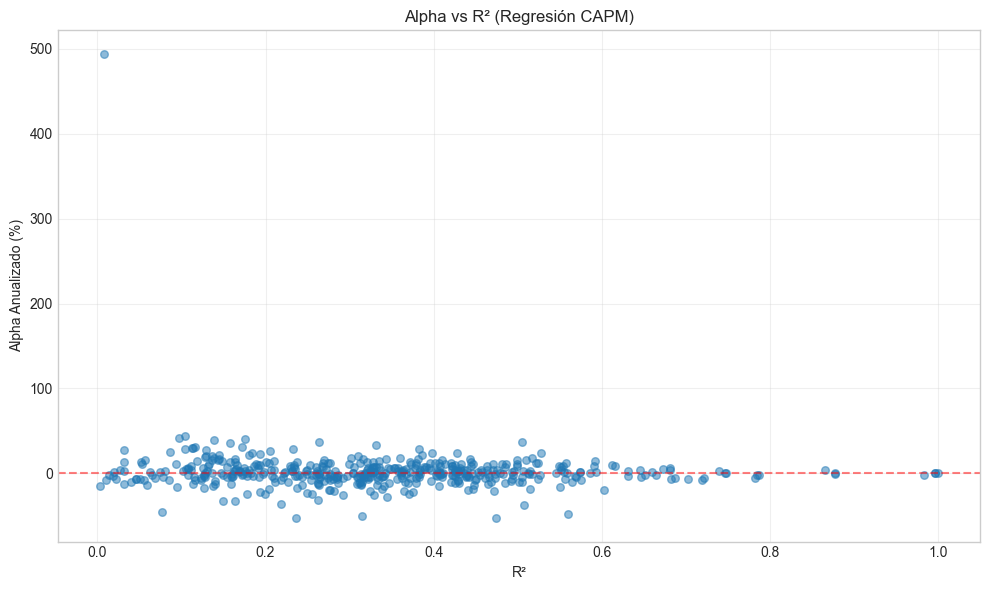

In [12]:
# ================================================
# Calcular Alpha y R² mediante regresión CAPM
# Ri = Alpha + Beta * Rm + epsilon
# ================================================
print("📊 Calculando Alpha y R² (Regresión CAPM)...")

def calculate_capm_regression(asset_returns, market_returns):
    """Calcula alpha, beta y R² de la regresión CAPM"""
    # Eliminar NaN
    valid_idx = ~(asset_returns.isna() | market_returns.isna())
    y = asset_returns[valid_idx]
    x = market_returns[valid_idx]
    
    if len(y) < 10:
        return np.nan, np.nan, np.nan
    
    # Regresión lineal
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    return intercept, slope, r_value**2

# Calcular para cada activo
capm_results = {}
for ticker in all_tickers:
    alpha, b, r2 = calculate_capm_regression(returns_daily[ticker], benchmark_returns)
    capm_results[ticker] = {'alpha_daily': alpha, 'beta_capm': b, 'r_squared': r2}

capm_df = pd.DataFrame(capm_results).T

# Alpha anualizado
alpha = capm_df['alpha_daily'] * TRADING_DAYS
r_squared = capm_df['r_squared']

print(f"\n✅ Alpha y R² calculados")
print(f"   • Alpha anualizado promedio: {alpha.mean()*100:.2f}%")
print(f"   • R² promedio: {r_squared.mean():.3f}")
print(f"   • R² mínimo: {r_squared.min():.3f} ({r_squared.idxmin()})")
print(f"   • R² máximo: {r_squared.max():.3f} ({r_squared.idxmax()})")

# Scatter plot Alpha vs R²
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(r_squared, alpha*100, alpha=0.5, s=30)
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax.set_xlabel('R²')
ax.set_ylabel('Alpha Anualizado (%)')
ax.set_title('Alpha vs R² (Regresión CAPM)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(FIGURES_PATH / '02_alpha_vs_r2.png', dpi=150, bbox_inches='tight')
plt.show()

## 11. Calcular Correlación con Benchmark

📊 Calculando correlación con benchmark...

✅ Correlación calculada
   • Correlación promedio: 0.547
   • Correlación mínima: -0.748 (VIXY)
   • Correlación máxima: 1.000 (SPY)

📋 Top 10 Activos menos correlacionados con SPY:
    1. VIXY   | Correlación: -0.748
    2. VXX    | Correlación: -0.688
    3. TLT    | Correlación: 0.051
    4. SBNY   | Correlación: 0.089
    5. IEF    | Correlación: 0.103
    6. SHY    | Correlación: 0.116
    7. CPB    | Correlación: 0.137
    8. GLD    | Correlación: 0.141
    9. UNG    | Correlación: 0.150
   10. SJM    | Correlación: 0.162


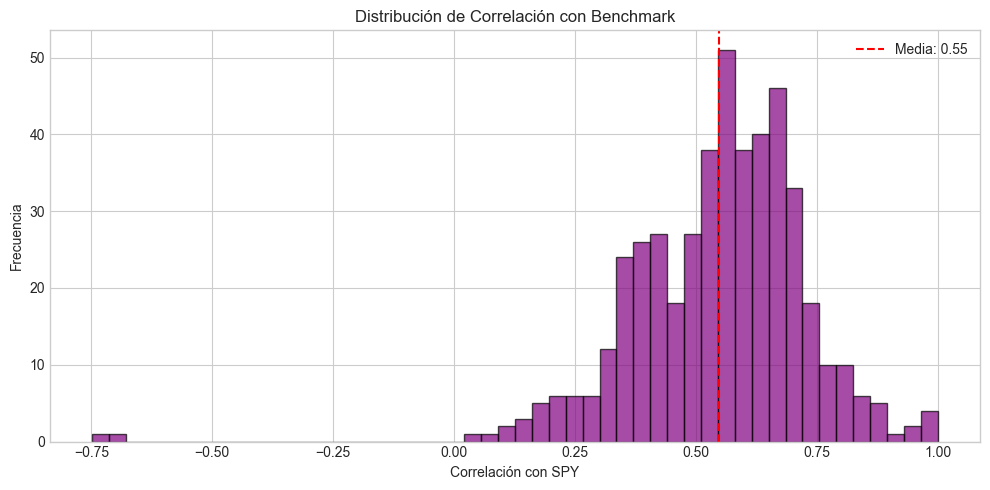

In [13]:
# ================================================
# Calcular Correlación con Benchmark
# ================================================
print("📊 Calculando correlación con benchmark...")

# Correlación de cada activo con SPY
correlation_benchmark = returns_daily.corrwith(benchmark_returns)

print(f"\n✅ Correlación calculada")
print(f"   • Correlación promedio: {correlation_benchmark.mean():.3f}")
print(f"   • Correlación mínima: {correlation_benchmark.min():.3f} ({correlation_benchmark.idxmin()})")
print(f"   • Correlación máxima: {correlation_benchmark.max():.3f} ({correlation_benchmark.idxmax()})")

# Activos menos correlacionados (diversificadores)
print(f"\n📋 Top 10 Activos menos correlacionados con {BENCHMARK}:")
low_corr = correlation_benchmark.sort_values().head(10)
for i, (ticker, corr) in enumerate(low_corr.items(), 1):
    print(f"   {i:2}. {ticker:<6} | Correlación: {corr:.3f}")

# Distribución de correlaciones
fig, ax = plt.subplots(figsize=(10, 5))
correlation_benchmark.hist(bins=50, ax=ax, edgecolor='black', alpha=0.7, color='purple')
ax.axvline(x=correlation_benchmark.mean(), color='red', linestyle='--', label=f'Media: {correlation_benchmark.mean():.2f}')
ax.set_xlabel('Correlación con SPY')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de Correlación con Benchmark')
ax.legend()
plt.tight_layout()
plt.savefig(FIGURES_PATH / '02_correlation_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 12. Calcular VaR y CVaR al 95%

In [14]:
# ================================================
# Calcular VaR (Value at Risk) al 95%
# VaR = Percentil 5 de retornos (pérdida máxima esperada)
# ================================================
print("📊 Calculando VaR al 95%...")

confidence_level = 0.95

# VaR histórico (percentil 5)
var_95 = returns_daily.quantile(1 - confidence_level)

print(f"\n✅ VaR al {confidence_level*100:.0f}% calculado")
print(f"   • VaR promedio: {var_95.mean()*100:.2f}%")
print(f"   • VaR mínimo (mejor): {var_95.max()*100:.2f}% ({var_95.idxmax()})")
print(f"   • VaR máximo (peor): {var_95.min()*100:.2f}% ({var_95.idxmin()})")
print(f"   • VaR {BENCHMARK}: {var_95[BENCHMARK]*100:.2f}%")

📊 Calculando VaR al 95%...

✅ VaR al 95% calculado
   • VaR promedio: -2.87%
   • VaR mínimo (mejor): -0.22% (SHY)
   • VaR máximo (peor): -13.62% (SBNY)
   • VaR SPY: -1.77%


📊 Calculando CVaR (Expected Shortfall) al 95%...

✅ CVaR al 95% calculado
   • CVaR promedio: -4.15%
   • CVaR mínimo (mejor): -0.32% (SHY)
   • CVaR máximo (peor): -35.95% (SBNY)
   • CVaR SPY: -2.53%


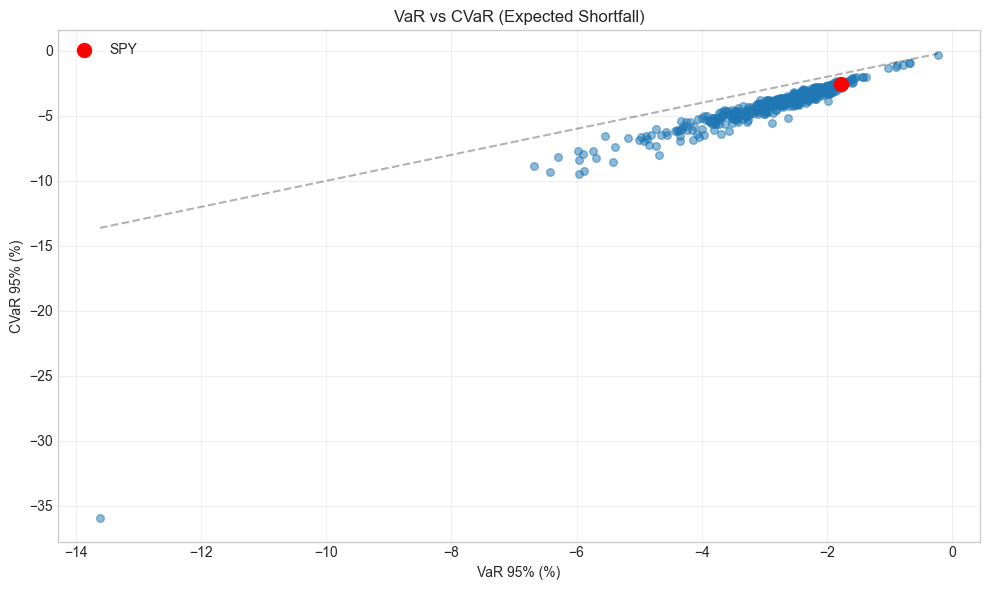

In [15]:
# ================================================
# Calcular CVaR (Conditional VaR / Expected Shortfall)
# CVaR = Promedio de pérdidas que exceden el VaR
# ================================================
print("📊 Calculando CVaR (Expected Shortfall) al 95%...")

def calculate_cvar(returns, confidence=0.95):
    """Calcula el CVaR (Expected Shortfall)"""
    var = returns.quantile(1 - confidence)
    return returns[returns <= var].mean()

# CVaR para cada activo
cvar_95 = returns_daily.apply(calculate_cvar, confidence=confidence_level)

print(f"\n✅ CVaR al {confidence_level*100:.0f}% calculado")
print(f"   • CVaR promedio: {cvar_95.mean()*100:.2f}%")
print(f"   • CVaR mínimo (mejor): {cvar_95.max()*100:.2f}% ({cvar_95.idxmax()})")
print(f"   • CVaR máximo (peor): {cvar_95.min()*100:.2f}% ({cvar_95.idxmin()})")
print(f"   • CVaR {BENCHMARK}: {cvar_95[BENCHMARK]*100:.2f}%")

# Visualización VaR vs CVaR
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(var_95*100, cvar_95*100, alpha=0.5, s=30)
ax.scatter(var_95[BENCHMARK]*100, cvar_95[BENCHMARK]*100, color='red', s=100, label=BENCHMARK, zorder=5)
ax.plot([var_95.min()*100, var_95.max()*100], [var_95.min()*100, var_95.max()*100], 'k--', alpha=0.3)
ax.set_xlabel('VaR 95% (%)')
ax.set_ylabel('CVaR 95% (%)')
ax.set_title('VaR vs CVaR (Expected Shortfall)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(FIGURES_PATH / '02_var_vs_cvar.png', dpi=150, bbox_inches='tight')
plt.show()

## 13. Features Adicionales

In [16]:
# ================================================
# Calcular Features Adicionales
# ================================================
print("📊 Calculando features adicionales...")

# Skewness (asimetría de retornos)
skewness = returns_daily.skew()

# Kurtosis (colas pesadas)
kurtosis = returns_daily.kurtosis()

# Positive return ratio (% de días con retorno positivo)
positive_return_ratio = (returns_daily > 0).sum() / len(returns_daily)

# Average gain / Average loss ratio
avg_gain = returns_daily[returns_daily > 0].mean()
avg_loss = returns_daily[returns_daily < 0].mean().abs()
gain_loss_ratio = avg_gain / avg_loss

# Volatilidad de la volatilidad (rolling std de 21 días)
rolling_vol = returns_daily.rolling(21).std()
vol_of_vol = rolling_vol.std()

print(f"\n✅ Features adicionales calculados")
print(f"   • Skewness promedio: {skewness.mean():.3f}")
print(f"   • Kurtosis promedio: {kurtosis.mean():.3f}")
print(f"   • % Días positivos promedio: {positive_return_ratio.mean()*100:.1f}%")
print(f"   • Ratio Ganancia/Pérdida promedio: {gain_loss_ratio.mean():.3f}")

📊 Calculando features adicionales...

✅ Features adicionales calculados
   • Skewness promedio: -0.069
   • Kurtosis promedio: 5.286
   • % Días positivos promedio: 51.2%
   • Ratio Ganancia/Pérdida promedio: 1.004


## 14. Construir DataFrame de Features

In [17]:
# ================================================
# Consolidar todas las features en un DataFrame
# ================================================
print("📊 Consolidando matriz de features...")

features_df = pd.DataFrame({
    # Retornos
    'return_total': total_return,
    'return_annualized': annualized_return,
    'return_mean_daily': returns_daily.mean(),
    
    # Riesgo
    'volatility_annual': volatility_annual,
    'downside_dev_annual': downside_dev_annual,
    'max_drawdown': max_drawdown,
    'var_95': var_95,
    'cvar_95': cvar_95,
    
    # Ratios ajustados por riesgo
    'sharpe_ratio': sharpe_ratio,
    'sortino_ratio': sortino_ratio,
    'calmar_ratio': calmar_ratio,
    
    # Exposición al mercado
    'beta': beta,
    'alpha_annual': alpha,
    'r_squared': r_squared,
    'correlation_spy': correlation_benchmark,
    
    # Distribución de retornos
    'skewness': skewness,
    'kurtosis': kurtosis,
    'positive_return_ratio': positive_return_ratio,
    'gain_loss_ratio': gain_loss_ratio,
    'vol_of_vol': vol_of_vol
})

# Agregar ticker como columna
features_df.index.name = 'ticker'

print(f"\n✅ Matriz de features creada")
print(f"   📊 Dimensiones: {features_df.shape[0]} activos x {features_df.shape[1]} features")
print(f"\n📋 Lista de features:")
for i, col in enumerate(features_df.columns, 1):
    print(f"   {i:2}. {col}")

display(features_df.head(10))

📊 Consolidando matriz de features...

✅ Matriz de features creada
   📊 Dimensiones: 468 activos x 20 features

📋 Lista de features:
    1. return_total
    2. return_annualized
    3. return_mean_daily
    4. volatility_annual
    5. downside_dev_annual
    6. max_drawdown
    7. var_95
    8. cvar_95
    9. sharpe_ratio
   10. sortino_ratio
   11. calmar_ratio
   12. beta
   13. alpha_annual
   14. r_squared
   15. correlation_spy
   16. skewness
   17. kurtosis
   18. positive_return_ratio
   19. gain_loss_ratio
   20. vol_of_vol


,return_total,return_annualized,return_mean_daily,volatility_annual,downside_dev_annual,max_drawdown,var_95,cvar_95,sharpe_ratio,sortino_ratio,calmar_ratio,beta,alpha_annual,r_squared,correlation_spy,skewness,kurtosis,positive_return_ratio,gain_loss_ratio,vol_of_vol
ticker,,,,,,,,,,,,,,,,,,,,
A,0.1719,0.0546,0.0004,0.2823,0.2796,-0.4357,-0.0294,-0.0377,0.1518,0.1533,0.1254,1.0484,-0.0127,0.4304,0.6561,0.2396,2.0630,0.5160,0.9863,0.0053
AAL,-0.0919,-0.0318,0.0003,0.4698,0.4494,-0.5771,-0.0443,-0.0620,0.0588,0.0615,-0.0551,1.4070,-0.0640,0.2800,0.5291,0.1936,1.2475,0.4840,1.0762,0.0088
AAP,-0.6121,-0.2721,-0.0009,0.3973,0.4634,-0.8005,-0.0356,-0.0617,-0.7075,-0.6066,-0.3399,0.9114,-0.3228,0.1642,0.4053,-4.0701,52.1465,0.4960,0.9073,0.0120
AAPL,0.4878,0.1425,0.0007,0.2780,0.2758,-0.3131,-0.0298,-0.0385,0.4378,0.4412,0.4552,1.2637,0.0445,0.6451,0.8032,0.1025,1.7348,0.5199,1.0188,0.0058
ABBV,0.4702,0.1380,0.0006,0.2084,0.2296,-0.2426,-0.0193,-0.0324,0.4848,0.4400,0.5687,0.3610,0.1147,0.0937,0.3060,-0.9512,4.9256,0.5492,0.9286,0.0037
ABT,0.0088,0.0029,0.0001,0.2280,0.2346,-0.3624,-0.0223,-0.0321,-0.0923,-0.0897,0.0081,0.7260,-0.0441,0.3166,0.5627,-0.2377,4.1745,0.5146,0.9612,0.0041
ACN,0.3683,0.1109,0.0005,0.2563,0.2578,-0.4074,-0.0262,-0.0367,0.3429,0.3410,0.2722,1.1524,0.0219,0.6309,0.7943,0.0586,2.1731,0.5239,0.9879,0.0056
ADBE,0.2292,0.0717,0.0005,0.3609,0.3838,-0.6002,-0.0342,-0.0546,0.2359,0.2218,0.1194,1.4638,-0.0122,0.5133,0.7165,-0.8044,5.6652,0.5186,0.9886,0.0078
ADI,0.3598,0.1086,0.0006,0.3039,0.3044,-0.2758,-0.0311,-0.0412,0.3262,0.3257,0.3937,1.2814,0.0202,0.5548,0.7448,0.0057,1.1404,0.5226,0.9880,0.0051


In [18]:
# ================================================
# Verificar valores nulos e infinitos
# ================================================
print("🔍 Verificando calidad de features...")

# Nulos por columna
null_counts = features_df.isnull().sum()
inf_counts = np.isinf(features_df.select_dtypes(include=[np.number])).sum()

print(f"\n📋 Nulos por feature:")
for col in features_df.columns:
    n_nulls = null_counts[col]
    n_infs = inf_counts[col] if col in inf_counts else 0
    if n_nulls > 0 or n_infs > 0:
        print(f"   • {col}: {n_nulls} nulos, {n_infs} infinitos")

total_nulls = features_df.isnull().sum().sum()
print(f"\n📊 Total valores nulos: {total_nulls}")

# Reemplazar infinitos con NaN
features_df = features_df.replace([np.inf, -np.inf], np.nan)

# Mostrar activos con datos faltantes
tickers_with_nulls = features_df[features_df.isnull().any(axis=1)].index.tolist()
if len(tickers_with_nulls) > 0:
    print(f"\n⚠️ Activos con datos faltantes: {len(tickers_with_nulls)}")

🔍 Verificando calidad de features...

📋 Nulos por feature:

📊 Total valores nulos: 0


In [19]:
# ================================================
# Estadísticas descriptivas de features
# ================================================
print("📊 Estadísticas descriptivas de features:")
print("=" * 60)

display(features_df.describe().T)

📊 Estadísticas descriptivas de features:


,count,mean,std,min,25%,50%,75%,max
return_total,468.0000,0.2569,0.5092,-0.9882,-0.0366,0.1856,0.4496,2.7773
return_annualized,468.0000,0.0600,0.1484,-0.7746,-0.0124,0.0588,0.1326,0.5617
return_mean_daily,468.0000,0.0004,0.0011,-0.0031,0.0001,0.0004,0.0007,0.0204
volatility_annual,468.0000,0.3018,0.2027,0.0219,0.2315,0.2743,0.3419,4.1123
downside_dev_annual,468.0000,0.2986,0.1308,0.0215,0.2352,0.2771,0.3420,2.2267
max_drawdown,468.0000,-0.4063,0.1574,-1.0000,-0.4911,-0.3794,-0.2892,-0.0682
var_95,468.0000,-0.0287,0.0106,-0.1362,-0.0328,-0.0266,-0.0223,-0.0022
cvar_95,468.0000,-0.0415,0.0198,-0.3595,-0.0472,-0.0386,-0.0323,-0.0032
sharpe_ratio,468.0000,0.1483,0.4620,-3.0696,-0.0685,0.1678,0.4173,1.4156
sortino_ratio,468.0000,0.1541,0.4768,-3.1228,-0.0690,0.1729,0.4130,2.2912


## 15. Visualización de Features

📊 Generando heatmap de correlación entre features...


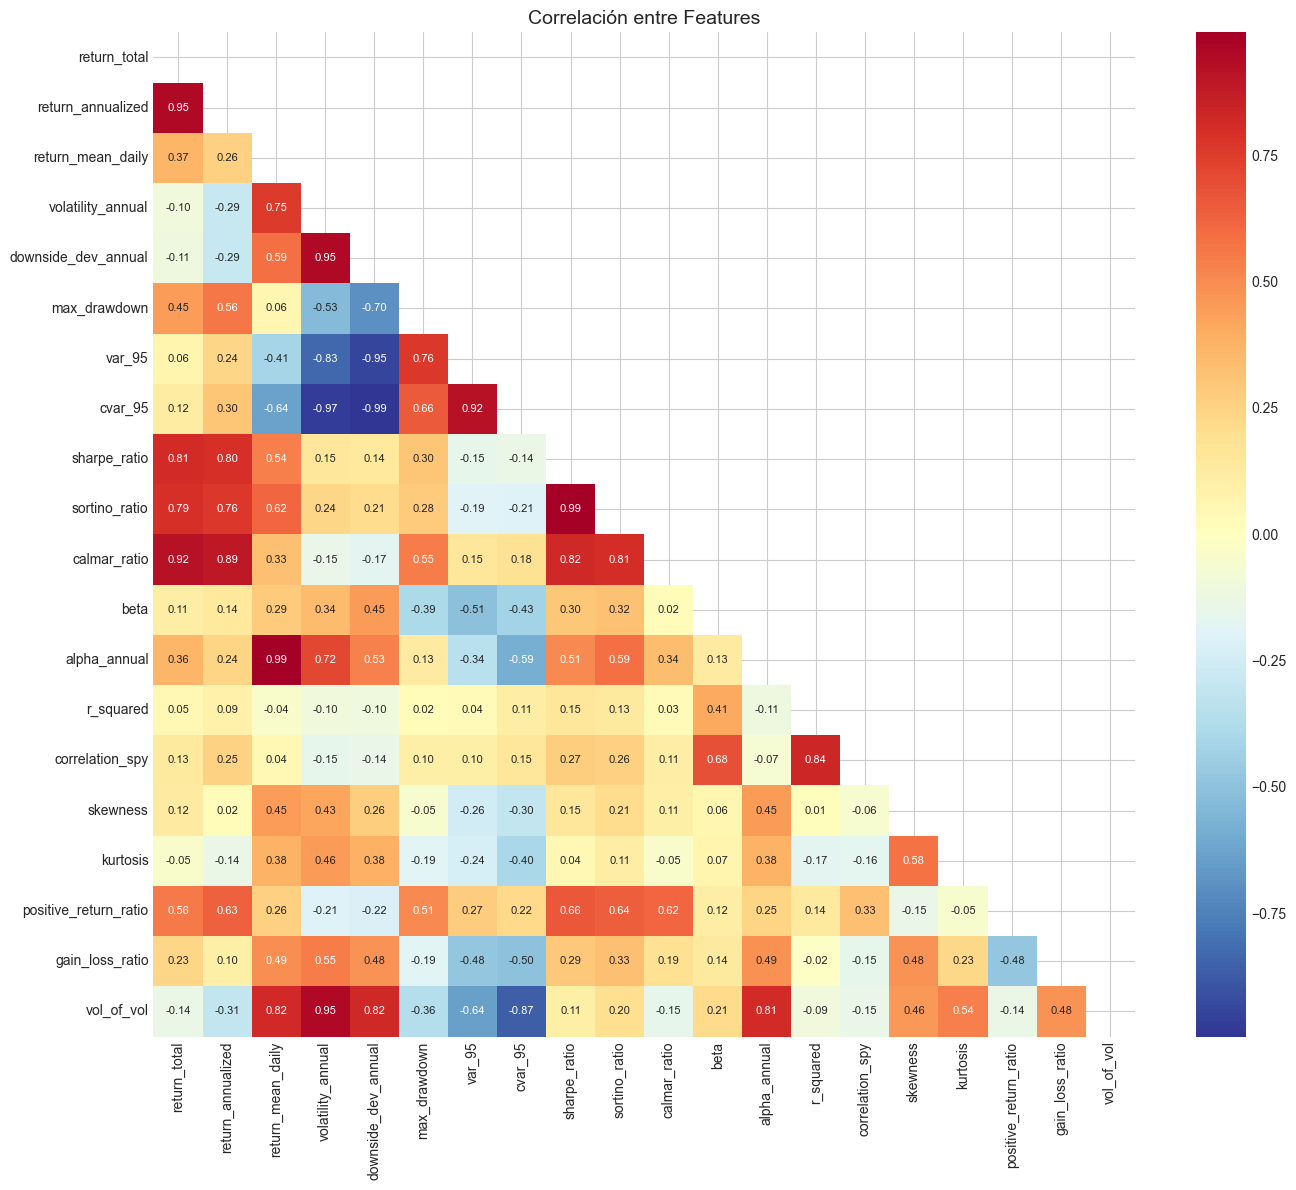

In [20]:
# ================================================
# Heatmap de correlación entre features
# ================================================
print("📊 Generando heatmap de correlación entre features...")

fig, ax = plt.subplots(figsize=(14, 12))
corr_features = features_df.corr()
mask = np.triu(np.ones_like(corr_features, dtype=bool))

sns.heatmap(corr_features, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlBu_r', center=0, ax=ax,
            annot_kws={'size': 8})
ax.set_title('Correlación entre Features', fontsize=14)
plt.tight_layout()
plt.savefig(FIGURES_PATH / '02_features_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

📊 Generando scatter plots de features clave...


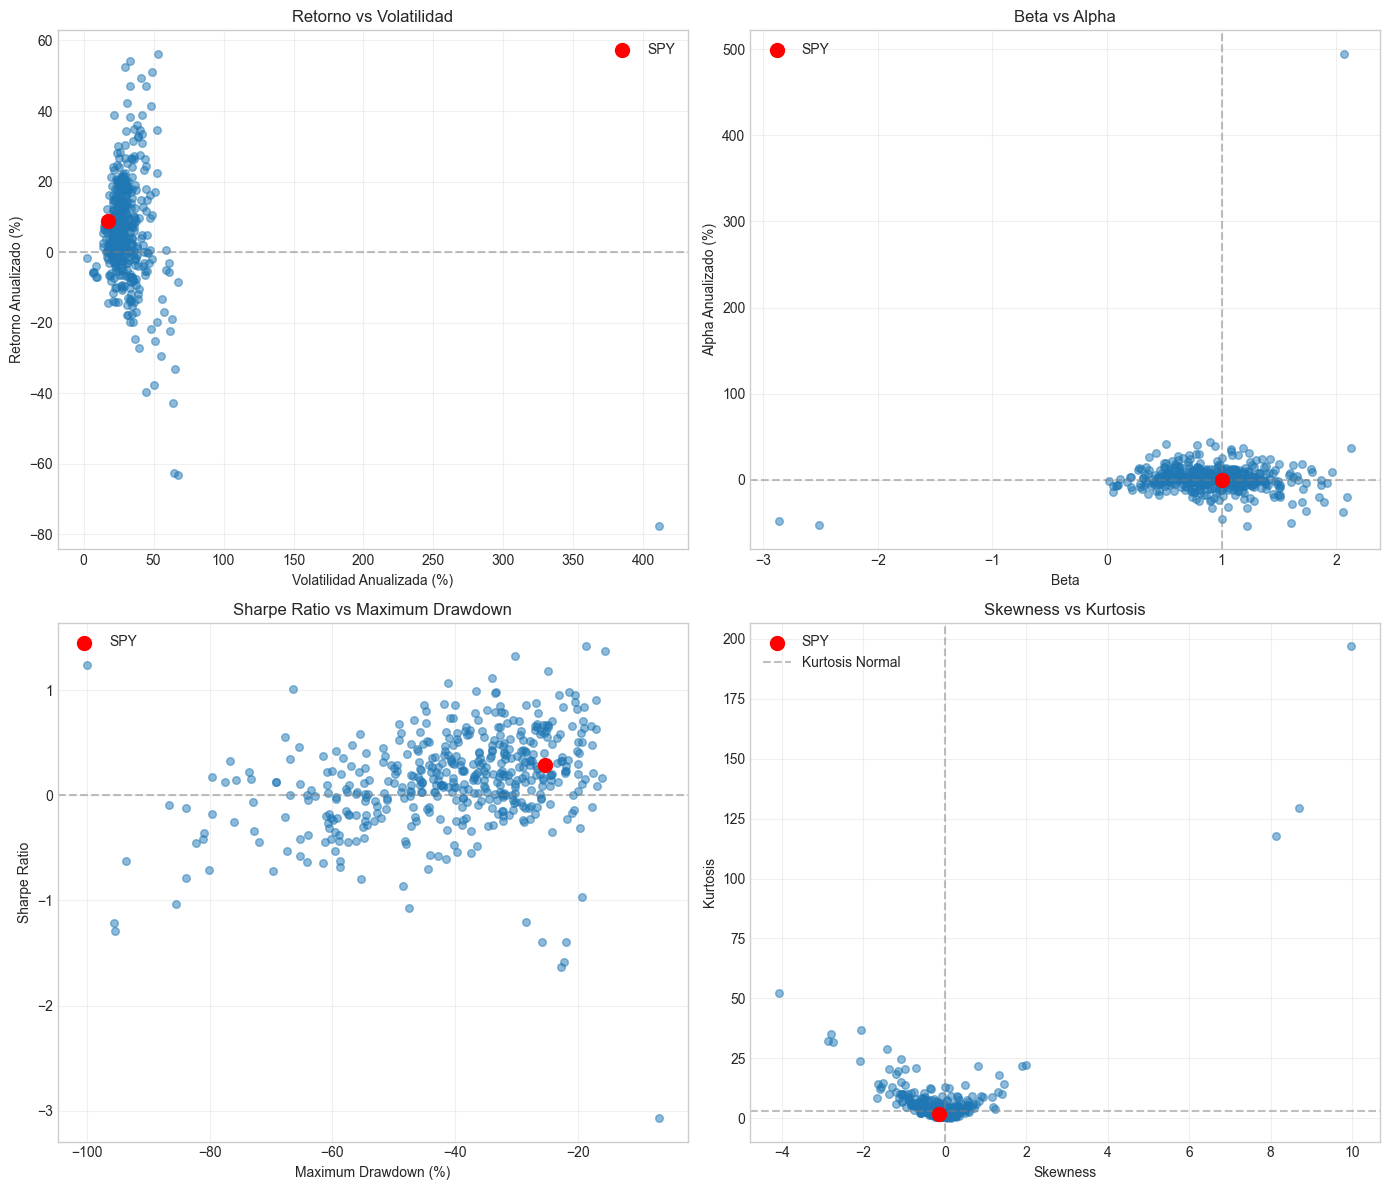

In [21]:
# ================================================
# Scatter plots de features clave
# ================================================
print("📊 Generando scatter plots de features clave...")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Return vs Volatility
ax = axes[0, 0]
ax.scatter(features_df['volatility_annual']*100, features_df['return_annualized']*100, alpha=0.5, s=30)
ax.scatter(features_df.loc[BENCHMARK, 'volatility_annual']*100, features_df.loc[BENCHMARK, 'return_annualized']*100, 
           color='red', s=100, label=BENCHMARK, zorder=5)
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('Volatilidad Anualizada (%)')
ax.set_ylabel('Retorno Anualizado (%)')
ax.set_title('Retorno vs Volatilidad')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. Beta vs Alpha
ax = axes[0, 1]
ax.scatter(features_df['beta'], features_df['alpha_annual']*100, alpha=0.5, s=30)
ax.scatter(features_df.loc[BENCHMARK, 'beta'], features_df.loc[BENCHMARK, 'alpha_annual']*100, 
           color='red', s=100, label=BENCHMARK, zorder=5)
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=1, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('Beta')
ax.set_ylabel('Alpha Anualizado (%)')
ax.set_title('Beta vs Alpha')
ax.legend()
ax.grid(True, alpha=0.3)

# 3. Sharpe vs Max Drawdown
ax = axes[1, 0]
ax.scatter(features_df['max_drawdown']*100, features_df['sharpe_ratio'], alpha=0.5, s=30)
ax.scatter(features_df.loc[BENCHMARK, 'max_drawdown']*100, features_df.loc[BENCHMARK, 'sharpe_ratio'], 
           color='red', s=100, label=BENCHMARK, zorder=5)
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('Maximum Drawdown (%)')
ax.set_ylabel('Sharpe Ratio')
ax.set_title('Sharpe Ratio vs Maximum Drawdown')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. Skewness vs Kurtosis
ax = axes[1, 1]
ax.scatter(features_df['skewness'], features_df['kurtosis'], alpha=0.5, s=30)
ax.scatter(features_df.loc[BENCHMARK, 'skewness'], features_df.loc[BENCHMARK, 'kurtosis'], 
           color='red', s=100, label=BENCHMARK, zorder=5)
ax.axhline(y=3, color='gray', linestyle='--', alpha=0.5, label='Kurtosis Normal')
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('Skewness')
ax.set_ylabel('Kurtosis')
ax.set_title('Skewness vs Kurtosis')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES_PATH / '02_features_scatter.png', dpi=150, bbox_inches='tight')
plt.show()

## 16. Exportar DataFrame de Features

In [22]:
# ================================================
# Exportar matriz de features
# ================================================
print("💾 Exportando matriz de features...")

# Ruta de exportación
features_path = DATA_PATH / 'features_matrix.csv'

# Exportar con ticker como índice
features_df.to_csv(features_path, index=True)

print(f"\n✅ Matriz de features exportada")
print(f"   📁 Ruta: {features_path}")
print(f"   📊 Dimensiones: {features_df.shape[0]} activos x {features_df.shape[1]} features")
print(f"   💾 Tamaño: {features_path.stat().st_size / 1024:.2f} KB")

💾 Exportando matriz de features...

✅ Matriz de features exportada
   📁 Ruta: c:\Users\carlo\Documents\4.DS\riskmanagement2025\data\features_matrix.csv
   📊 Dimensiones: 468 activos x 20 features
   💾 Tamaño: 185.15 KB


## 17. Resumen y Conclusiones

In [23]:
# ================================================
# Resumen final del Feature Engineering
# ================================================
print("="*70)
print("📊 RESUMEN FINAL - FEATURE ENGINEERING")
print("="*70)

print(f"""
📁 DATOS DE ENTRADA:
   • Archivo: prices_train.csv
   • Período: {prices_train.index.min().date()} → {prices_train.index.max().date()}
   • Activos: {len(all_tickers)}
   • Días de trading: {len(prices_train)}

📊 FEATURES CALCULADOS ({features_df.shape[1]} en total):

   📈 RETORNOS:
      • return_total: Retorno total del período
      • return_annualized: Retorno anualizado
      • return_mean_daily: Retorno diario promedio

   ⚠️ RIESGO:
      • volatility_annual: Volatilidad anualizada
      • downside_dev_annual: Desviación a la baja anualizada
      • max_drawdown: Máxima caída desde el pico
      • var_95: Value at Risk al 95%
      • cvar_95: Conditional VaR (Expected Shortfall)

   📐 RATIOS AJUSTADOS POR RIESGO:
      • sharpe_ratio: (Retorno - Rf) / Volatilidad
      • sortino_ratio: (Retorno - Rf) / Downside Dev
      • calmar_ratio: Retorno / |Max Drawdown|

   🎯 EXPOSICIÓN AL MERCADO:
      • beta: Sensibilidad al mercado (SPY)
      • alpha_annual: Exceso de retorno vs CAPM
      • r_squared: % varianza explicada por el mercado
      • correlation_spy: Correlación con benchmark

   📊 DISTRIBUCIÓN DE RETORNOS:
      • skewness: Asimetría de retornos
      • kurtosis: Colas pesadas
      • positive_return_ratio: % días con retorno positivo
      • gain_loss_ratio: Ganancia promedio / Pérdida promedio
      • vol_of_vol: Volatilidad de la volatilidad

📁 ARCHIVOS GENERADOS:
   • {DATA_PATH / 'features_matrix.csv'}
   • {FIGURES_PATH / '02_volatility_distribution.png'}
   • {FIGURES_PATH / '02_sharpe_vs_sortino.png'}
   • {FIGURES_PATH / '02_mdd_distribution.png'}
   • {FIGURES_PATH / '02_beta_distribution.png'}
   • {FIGURES_PATH / '02_alpha_vs_r2.png'}
   • {FIGURES_PATH / '02_correlation_distribution.png'}
   • {FIGURES_PATH / '02_var_vs_cvar.png'}
   • {FIGURES_PATH / '02_features_correlation.png'}
   • {FIGURES_PATH / '02_features_scatter.png'}
""")

print("="*70)
print("✅ Notebook 02 completado. Continuar con Notebook 03: Clustering")
print("="*70)

📊 RESUMEN FINAL - FEATURE ENGINEERING

📁 DATOS DE ENTRADA:
   • Archivo: prices_train.csv
   • Período: 2021-01-04 → 2023-12-29
   • Activos: 468
   • Días de trading: 753

📊 FEATURES CALCULADOS (20 en total):

   📈 RETORNOS:
      • return_total: Retorno total del período
      • return_annualized: Retorno anualizado
      • return_mean_daily: Retorno diario promedio

   ⚠️ RIESGO:
      • volatility_annual: Volatilidad anualizada
      • downside_dev_annual: Desviación a la baja anualizada
      • max_drawdown: Máxima caída desde el pico
      • var_95: Value at Risk al 95%
      • cvar_95: Conditional VaR (Expected Shortfall)

   📐 RATIOS AJUSTADOS POR RIESGO:
      • sharpe_ratio: (Retorno - Rf) / Volatilidad
      • sortino_ratio: (Retorno - Rf) / Downside Dev
      • calmar_ratio: Retorno / |Max Drawdown|

   🎯 EXPOSICIÓN AL MERCADO:
      • beta: Sensibilidad al mercado (SPY)
      • alpha_annual: Exceso de retorno vs CAPM
      • r_squared: % varianza explicada por el mercado
 